# Breast cancer detection

using [this dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer) could you build a decent classifier to with a pretty good accuracy to detect the cancer ?

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [386]:
df = pd.read_csv("../datasets/breast-cancer.data")

In [387]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


# i - Data preparing

--- 

In [388]:
features = df.iloc[:, 1:-1].values
goal = df.iloc[:, -1].values
encoder = LabelEncoder()
features[:, 0] = encoder.fit_transform(features[:, 0])
features[:, 1] = encoder.fit_transform(features[:, 1])
features[:, 2] = encoder.fit_transform(features[:, 2])
features[:, 3] = encoder.fit_transform(features[:, 3])
features[:, 4] = encoder.fit_transform(features[:, 4])
features[:, 6] = encoder.fit_transform(features[:, 6])
features[:, 7] = encoder.fit_transform(features[:, 7])
oneHotEncoder = OneHotEncoder(categorical_features=[1,4,6,7])
features = oneHotEncoder.fit_transform(features).toarray()
features = features[:, [3,4,5]]
goal = encoder.fit_transform(goal)
x_train, x_test, y_train, y_test = train_test_split(features, goal, test_size=0.2, random_state=0)

---
---

# ii - Data Analysis

--- 

## 1- Find the relation between the features?

--- 

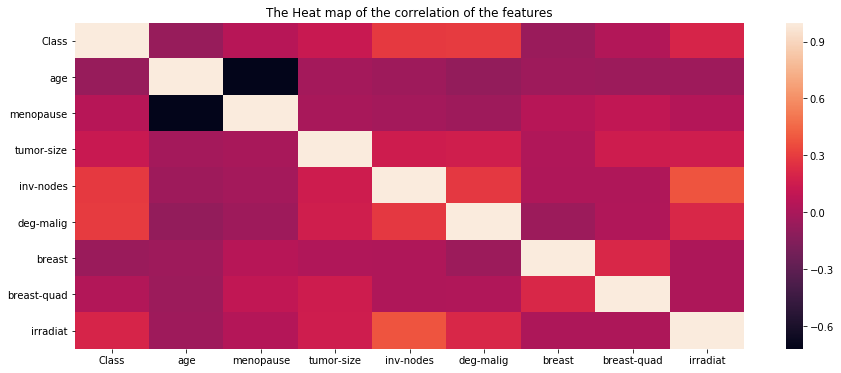

In [397]:
fig, ax =  plt.subplots(figsize=(15,6))
corr = dfcopy.corr()
sb.heatmap(corr, ax=ax)
plt.title("The Heat map of the correlation of the features");

---
---

## 2- Find the most age susceptible to the disease?

--- 

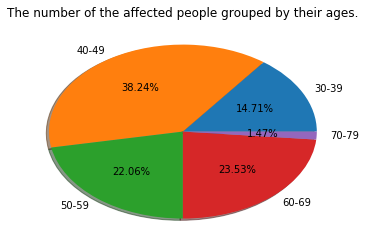

In [390]:
affected = df.loc[df['irradiat'] == 'yes'].groupby('age').count().iloc[:, 1]
ages = sorted(affected.index)
plt.pie(affected, labels = ages, autopct='%1.2f%%', shadow=True);
plt.title("The number of the affected people grouped by their ages.");

### - The numbers of affected people shows that the ages from 40 to 49 is the most age susceptible to the disease.

---
---

## 3- Find the most susceptible breast to the disease?

--- 

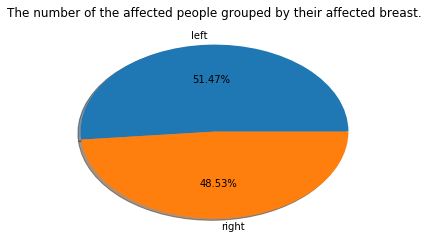

In [391]:
affected = df.loc[(df['irradiat'] == 'yes')].groupby('breast').count().iloc[:, 1]
breast = sorted(affected.index)
plt.pie(affected, labels = breast, autopct='%1.2f%%', shadow=True);
plt.title("The number of the affected people grouped by their affected breast.");

### - The left breast is the most affected breast in all the affected cases.

---
---

## 4- Find the most susceptible breast quad to the disease?

--- 

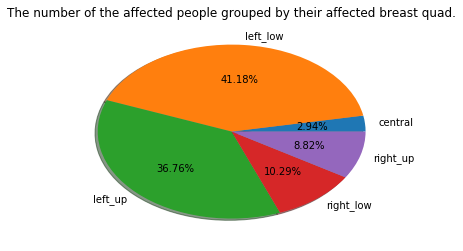

In [394]:
affected = df.loc[(df['irradiat'] == 'yes')].groupby('breast-quad').count().iloc[:, 1]
breast = sorted(affected.index)
plt.pie(affected, labels = breast, autopct='%1.2f%%', shadow=True);
plt.title("The number of the affected people grouped by their affected breast quad.");

### - The left low breast is the most affected breast quad in all the affected cases.

---
---

## 5- Find the most dangerous tumor size in the disease?

---

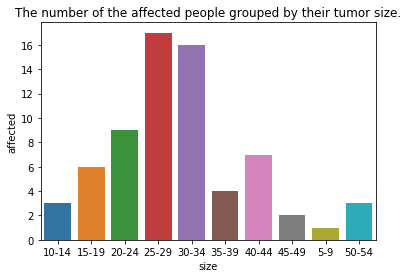

In [396]:
affected = df.loc[(df['irradiat'] == 'yes')].groupby('tumor-size').count().iloc[:, 1]
size = sorted(affected.index)
s=[]
s = list(affected.values)
plt.title("The number of the affected people grouped by their tumor size.");
affdf = pd.DataFrame({"affected": s
                     ,"size":size})
sb.barplot(x="size", y="affected", data=affdf);

### - The most dangerous tumor size is from 25 to 34.

---
---

# iii - The used Classifiers and their score values.

--- 

## KNN

--- 

In [325]:
maxscore = 0
maxK = 0

for K in range(1, len(x_train)):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_predict)
    score = knn.score(x_test, y_test)
    if score > maxscore:
        maxscore=score
        maxK = K
    
print("The maximum score = {} given by the K = {}".format(maxscore, maxK))

The maximum score = 0.8103448275862069 given by the K = 3


---
---

## Linear SVM

--- 

In [180]:
svm = SVC(kernel ='linear', random_state = 0)
svm.fit(x_train, y_train)
y_predict = svm.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", svm.score(x_test, y_test))

    0  1
0  45  0
1  13  0
Accuracy :  0.775862068966


---
---

## Gaussian SVM

--- 

In [181]:
svm = SVC(kernel ='rbf', random_state = 0)
svm.fit(x_train, y_train)
y_predict = svm.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", svm.score(x_test, y_test))

    0  1
0  45  0
1  13  0
Accuracy :  0.775862068966


---
---

## Poly SVM

--- 

In [182]:
svm = SVC(kernel ='poly', random_state = 0)
svm.fit(x_train, y_train)
y_predict = svm.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", svm.score(x_test, y_test))

    0  1
0  45  0
1  13  0
Accuracy :  0.775862068966


---
---

## Logistic Regression

--- 

In [183]:
logistic = LogisticRegression(random_state = 0)
logistic.fit(x_train, y_train)
y_predict = logistic.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", logistic.score(x_test, y_test))

    0  1
0  45  0
1  13  0
Accuracy :  0.775862068966


---
---

## GaussianNB

---

In [184]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_predict = GNB.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", GNB.score(x_test, y_test))

    0  1
0  41  4
1   7  6
Accuracy :  0.810344827586


---
---

## Decision Tree


--- 

In [185]:
DecisionTree = DecisionTreeClassifier(random_state=0)
DecisionTree.fit(x_train, y_train)
y_predict = DecisionDecisionTree = DecisionTreeClassifier(random_state=0)
DecisionTree.fit(x_train, y_train)
y_predict = DecisionTree.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", DecisionTree.score(x_test, y_test))

    0  1
0  45  0
1  13  0
Accuracy :  0.775862068966


---
---

## Another LinearSVC

--- 

In [186]:
svm = LinearSVC(random_state = 0)
svm.fit(x_train, y_train)
y_predict = svm.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
print(pd.DataFrame(cm))
print("Accuracy : ", svm.score(x_test, y_test))

    0  1
0  45  0
1  13  0
Accuracy :  0.775862068966


---
---